<a href="https://colab.research.google.com/github/O00O297/CCA-AI/blob/master/YOLOV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ln -s /content/drive/Shared\ drives/ /mydrive
!ls /mydrive/Thumbnail

 Annotation			       "_b'S59-8329-1-A-AFB-thumbnail.tiff"
"_b'S58-11494-1-E-thumbnail.tiff"      "_b'S59-8329-1A-thumbnail.tiff"
"_b'S58-11494-1E-thumbnail.tiff"       "_b'S60-1332-1E-AFB-thumbnail.tiff"
"_b'S58-11494-1-H-AFB-thumbnail.tiff"  "_b'S60-1332-1E-thumbnail.tiff"
"_b'S58-11494-1H-thumbnail.tiff"       "_b'S60-380-1B-thumbnail.tiff"
"_b'S58-11494-1-I-AFB-thumbnail.tiff"   ImageTiles
"_b'S58-11494-1I-thumbnail.tiff"        ImageTranformation
"_b'S59-16648-2A-AFB-thumbnail.tiff"    Model
"_b'S59-16648-2A-thumbnail.tiff"        YOLO3


In [ ]:
%cd /mydrive/Thumbnail/YOLO3

!pwd

/content/drive/Shared drives/Thumbnail/YOLO3
/content/drive/Shared drives/Thumbnail/YOLO3


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/drive/Shared drives/Thumbnail/YOLO3/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-04 06:33:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.9’

yolov3.weights.9    100%[===================>] 236.52M  3.29MB/s    in 76s     

2020-07-04 06:35:14 (3.13 MB/s) - ‘yolov3.weights.9’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

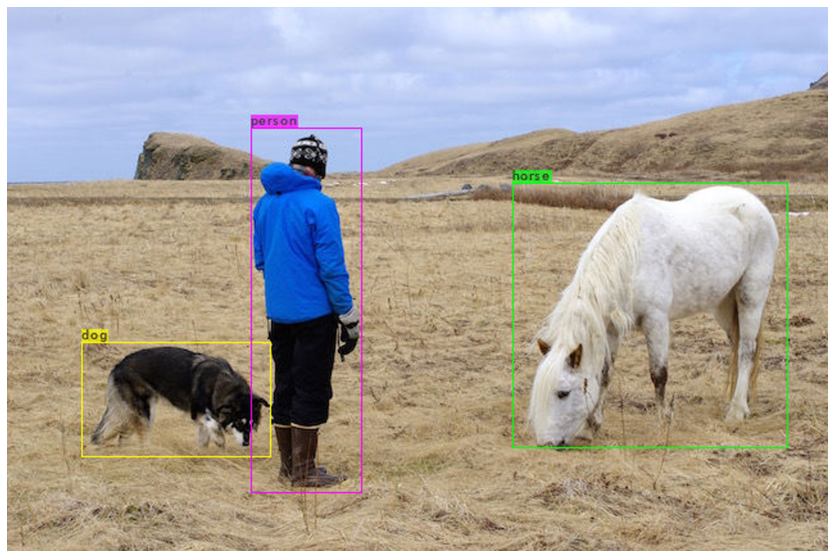

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
imShow('predictions.jpg')

In [ ]:
!cp /mydrive/Thumbnail/YOLO3/obj.zip ../

cp: '/mydrive/Thumbnail/YOLO3/obj.zip' and '../obj.zip' are the same file


In [ ]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/Positive_754_75_113.txt  
  inflating: data/obj/Positive_753_82_131.txt  
  inflating: data/obj/Positive_755_54_113.txt  
  inflating: data/obj/Positive_748_94_184.txt  
  inflating: data/obj/Positive_749_75_174.txt  
  inflating: data/obj/Positive_746_81_9.txt  
  inflating: data/obj/Positive_745_84_172.txt  
  inflating: data/obj/Positive_743_31_95.txt  
  inflating: data/obj/Positive_742_65_130.txt  
  inflating: data/obj/Positive_741_95_190.txt  
  inflating: data/obj/Positive_737_59_136.txt  
  inflating: data/obj/Positive_739_60_154.txt  
  inflating: data/obj/Positive_735_66_143.txt  
  inflating: data/obj/Positive_732_28_96.txt  
  inflating: data/obj/Positive_731_82_15.txt  
  inflating: data/obj/Positive_728_83_203.txt  
  inflating: data/obj/Positive_727_91_182.txt  
  inflating: data/obj/Positive_726_70_197.txt  
  inflating: data/obj/Positive_725_49_107.txt  
  inflating: data/obj/Positive_724_33_95.txt  
  inflating: data/obj/Pos

In [ ]:
!cp /mydrive/Thumbnail/YOLO3/yolov3_custom.cfg ./cfg

In [ ]:
!cp  /mydrive/Thumbnail/YOLO3/obj.names ./data
!cp  /mydrive/Thumbnail/YOLO3/obj.data  ./data

In [ ]:
!cp /mydrive/Thumbnail/YOLO3/generate_train.py ./

In [ ]:
!python generate_train.py
!ls data/


9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-07-04 06:51:16--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.6’

darknet53.conv.74.6 100%[===================>] 154.96M  1.44MB/s    in 2m 9s   

2020-07-04 06:53:26 (1.20 MB/s) - ‘darknet53.conv.74.6’ saved [162482580/162482580]



In [ ]:
# function ClickConnect(){
# console.log("Working"); 
# document.querySelector("colab-toolbar-button#connect").click() 
# }
# setInterval(ClickConnect,60000)

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 96097, rewritten_bbox = 0.000000 % 

 1926: 0.505702, 0.439225 avg loss, 0.000010 rate, 11.670653 seconds, 123264 images, 0.365235 hours left
Loaded: 0.000032 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.593687, GIOU: 0.593687), Class: 0.843473, Obj: 0.000223, No Obj: 0.000017, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.256017, iou_loss = 0.296841, total_loss = 0.552858 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.687997, GIOU: 0.687998), Class: 0.983858, Obj: 0.017145, No Obj: 0.000161, .5R: 1.000000, .75R: 0.000000, count: 2, class_loss = 0.582896, iou_loss = 0.125528, total_loss = 0.708424 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.479012, GIOU: 0.467802), Class: 0.984412, Obj: 0.000041, No Obj: 0.000034, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.253160, iou_loss = 0.220174, total_loss = 0.473334 
 tota

In [ ]:
!pwd

/content/drive/Shared drives/Thumbnail/YOLO3/darknet


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/Thumbnail/YOLO3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


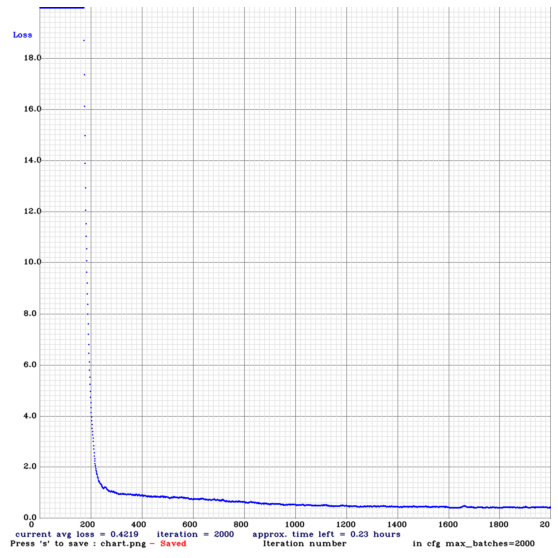

In [ ]:
imShow('chart.png')

In [ ]:
!ln -s /content/drive/Shared\ drives/ /mydrive
!ls /mydrive/Thumbnail

 Annotation			       "_b'S59-8329-1-A-AFB-thumbnail.tiff"
"_b'S58-11494-1-E-thumbnail.tiff"      "_b'S59-8329-1A-thumbnail.tiff"
"_b'S58-11494-1E-thumbnail.tiff"       "_b'S60-1332-1E-AFB-thumbnail.tiff"
"_b'S58-11494-1-H-AFB-thumbnail.tiff"  "_b'S60-1332-1E-thumbnail.tiff"
"_b'S58-11494-1H-thumbnail.tiff"       "_b'S60-380-1B-thumbnail.tiff"
"_b'S58-11494-1-I-AFB-thumbnail.tiff"   ImageTiles
"_b'S58-11494-1I-thumbnail.tiff"        ImageTranformation
"_b'S59-16648-2A-AFB-thumbnail.tiff"    Model
"_b'S59-16648-2A-thumbnail.tiff"        YOLO3


In [ ]:
!ls /mydrive/Thumbnail/YOLO3

backup	 generate_train.py  obj.data   obj.zip
darknet  obj		    obj.names  yolov3_custom.cfg


In [ ]:
!pwd

/content/drive/Shared drives/Thumbnail/YOLO3/darknet


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/drive/Shared drives/Thumbnail/YOLO3/darknet/cfg
/content/drive/Shared drives/Thumbnail/YOLO3/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

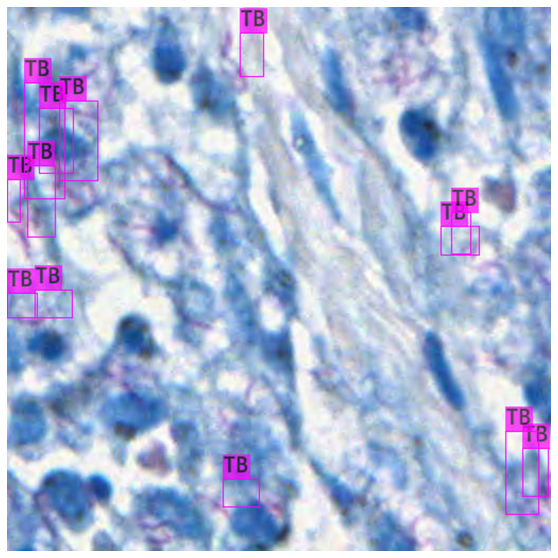

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)

!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Thumbnail/YOLO3/backup/yolov3_custom_last.weights /mydrive/Thumbnail/YOLO3/data/obj/Positive_4_94_186.tiff -thresh 0.01
imShow('predictions.jpg')